In [64]:
# !pip install imblearn

%matplotlib inline 

# !pip install imblearn
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

In [65]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
df = pd.read_csv("BankChurners .csv")

In [66]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [67]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [68]:
df.shape

(10127, 21)

In [69]:
df.columns#columns of the dataframe

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [70]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

 The column CLIENTNUM can dropped the as it is unique for each customer and will not add value to the model.

In [71]:
# Dropping columns - ID
df.drop(columns=["CLIENTNUM"], inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [73]:
#Column name adjustment to account for space ad better fit
bank = df.copy()
bank.rename(columns={'Customer_Age': 'Age', 'Dependent_count':'Dependents',
                         'Education_Level':'Education', 'Income_Category':'Income', 'Card_Category':'CardType',
                         'Months_on_book':'Timeline','Total_Relationship_Count':'TotalProduct','Months_Inactive_12_mon':'MonthsInactive',
                         'Contacts_Count_12_mon':'Contacts', 'Credit_Limit':'CreditLimit', 'Total_Revolving_Bal':'RevolvingBal', 
                          'Avg_Open_To_Buy':'CreditLine','Total_Amt_Chng_Q4_Q1':
                         'TransactionChange','Total_Ct_Chng_Q4_Q1':'TransactionCount', 'Avg_Utilization_Ratio': 'AvgCardUsage'}, inplace=True)
print(bank)

          Attrition_Flag  Age Gender  Dependents    Education Marital_Status  \
0      Existing Customer   45      M           3  High School        Married   
1      Existing Customer   49      F           5     Graduate         Single   
2      Existing Customer   51      M           3     Graduate        Married   
3      Existing Customer   40      F           4  High School        Unknown   
4      Existing Customer   40      M           3   Uneducated        Married   
...                  ...  ...    ...         ...          ...            ...   
10122  Existing Customer   50      M           2     Graduate         Single   
10123  Attrited Customer   41      M           2      Unknown       Divorced   
10124  Attrited Customer   44      F           1  High School        Married   
10125  Attrited Customer   30      M           2     Graduate        Unknown   
10126  Attrited Customer   43      F           2     Graduate        Married   

               Income CardType  Timelin

In [74]:
bank.describe().T

count         mean          std     min       25%  \
Age                10127.0    46.325960     8.016814    26.0    41.000   
Dependents         10127.0     2.346203     1.298908     0.0     1.000   
Timeline           10127.0    35.928409     7.986416    13.0    31.000   
TotalProduct       10127.0     3.812580     1.554408     1.0     3.000   
MonthsInactive     10127.0     2.341167     1.010622     0.0     2.000   
Contacts           10127.0     2.455317     1.106225     0.0     2.000   
CreditLimit        10127.0  8631.953698  9088.776650  1438.3  2555.000   
RevolvingBal       10127.0  1162.814061   814.987335     0.0   359.000   
CreditLine         10127.0  7469.139637  9090.685324     3.0  1324.500   
TransactionChange  10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt    10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct     10127.0    64.858695    23.472570    10.0    45.000   
TransactionCount   10127.0     0.712222     0.238086     0.0     0.582   
AvgCardUsage       10127.0     0.274894     0.275691     0.0     0.023   

                        50%        75%        max  
Age                  46.000     52.000     73.000  
Dependents            2.000      3.000      5.000  
Timeline             36.000     40.000     56.000  
TotalProduct          4.000      5.000      6.000  
MonthsInactive        2.000      3.000      6.000  
Contacts              2.000      3.000      6.000  
CreditLimit        4549.000  11067.500  34516.000  
RevolvingBal       1276.000   1784.000   2517.000  
CreditLine         3474.000   9859.000  34516.000  
TransactionChange     0.736      0.859      3.397  
Total_Trans_Amt    3899.000   4741.000  18484.000  
Total_Trans_Ct       67.000     81.000    139.000  
TransactionCount      0.702      0.818      3.714  
AvgCardUsage          0.176      0.503      0.999

In [75]:
# Making a list of all catrgorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education",
    "Marital_Status",
      "Income",
    "CardType",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(bank[column].value_counts())
    print("-" * 50)
    
    

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: CardType, dtype: int64
--------------------------------------------------


In [76]:
# Replacing Uneducated with Unknown
bank["Education"] = bank["Education"].replace(
    ["Uneducated"], "Unknown"
)


In [14]:
# number of missing values in each column
bank.isnull().sum()

Attrition_Flag       0
Age                  0
Gender               0
Dependents           0
Education            0
Marital_Status       0
Income               0
CardType             0
Timeline             0
TotalProduct         0
MonthsInactive       0
Contacts             0
CreditLimit          0
RevolvingBal         0
CreditLine           0
TransactionChange    0
Total_Trans_Amt      0
Total_Trans_Ct       0
TransactionCount     0
AvgCardUsage         0
dtype: int64

No missing values noted in the dataframe

# EDA
Univariate

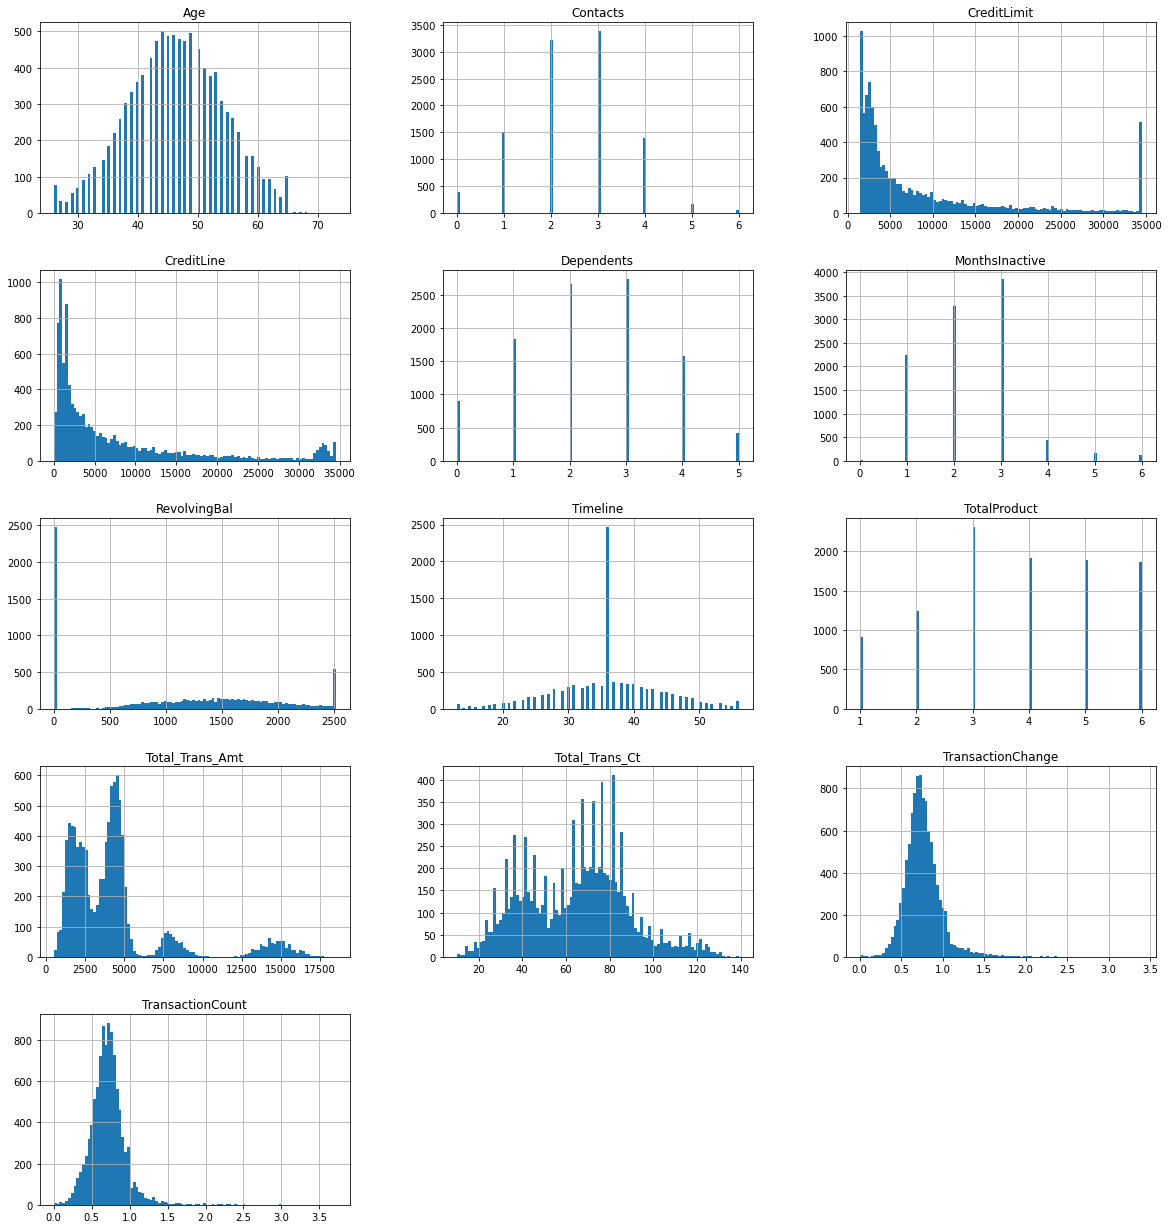

In [23]:
#histogram of 21 columns in the dataframe
columns = list(bank)[0:-1]
bank[columns].hist(stacked=False,bins=100, figsize=(20,40),layout=(9,3));

In [24]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=1.5) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

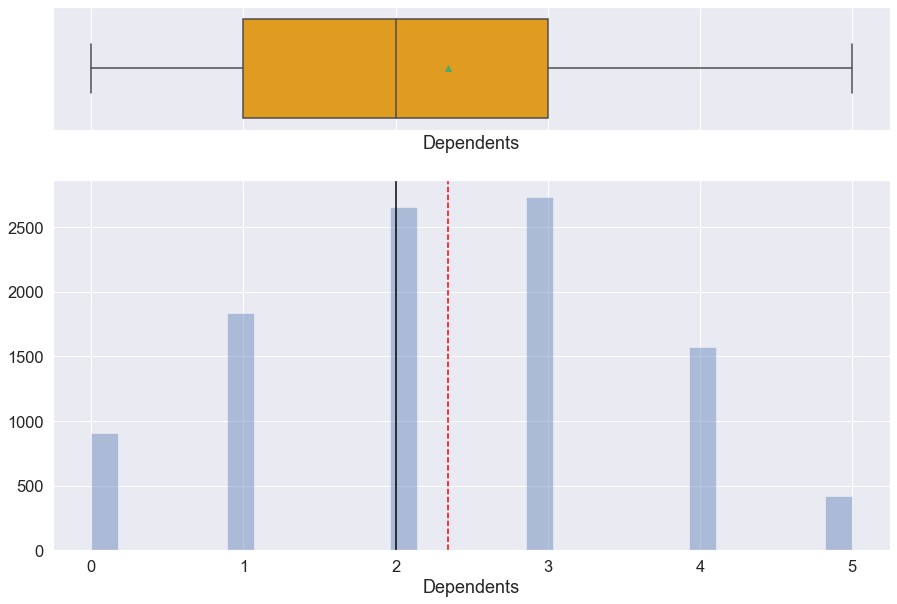

In [25]:
histogram_boxplot(bank['Dependents'])

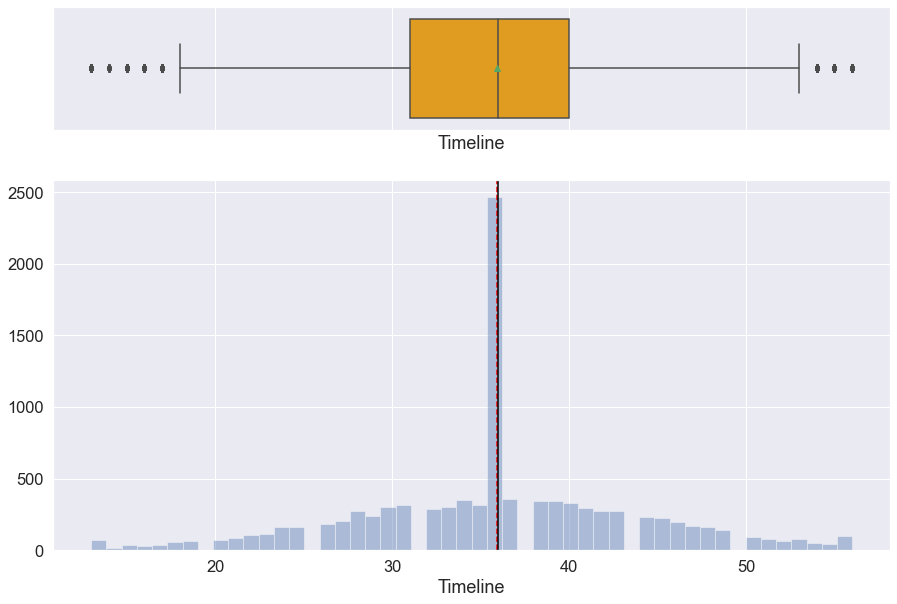

In [26]:
histogram_boxplot(bank['Timeline'])

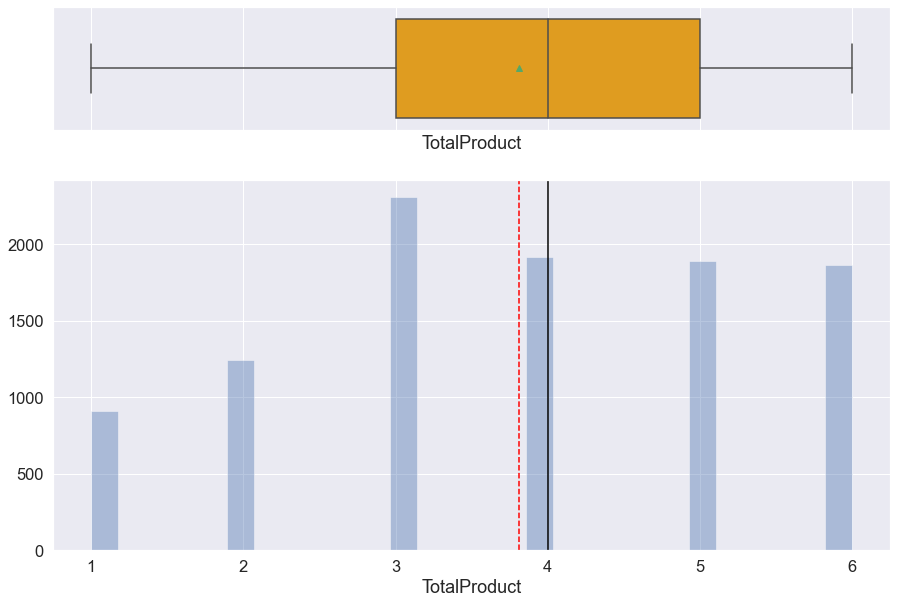

In [27]:
histogram_boxplot(bank['TotalProduct'])

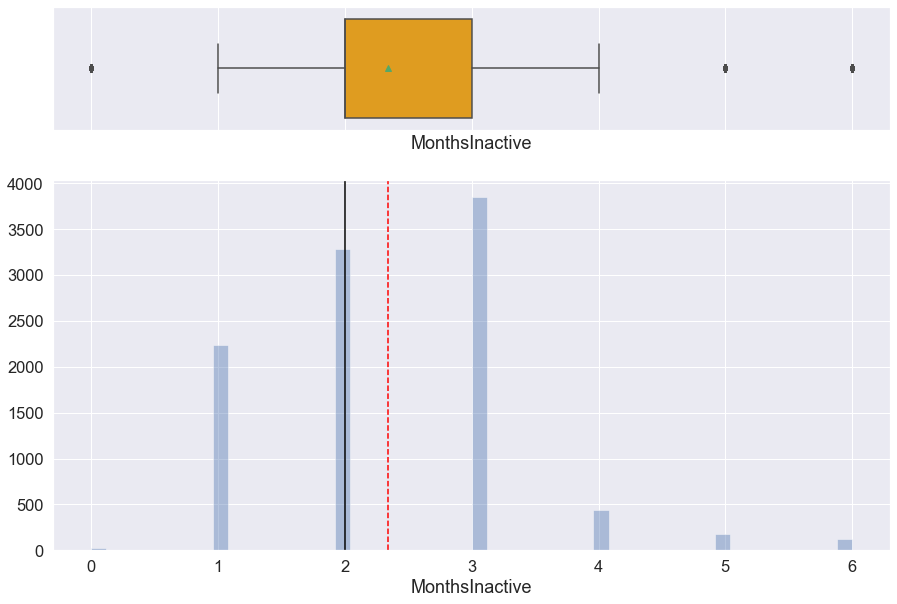

In [28]:
histogram_boxplot(bank['MonthsInactive'])

The boxplot indicates outliers to theleft and to the right end

This distribution spread shows that 3 months was the most inactive of customers in the last 12 month period
while 0 was the least

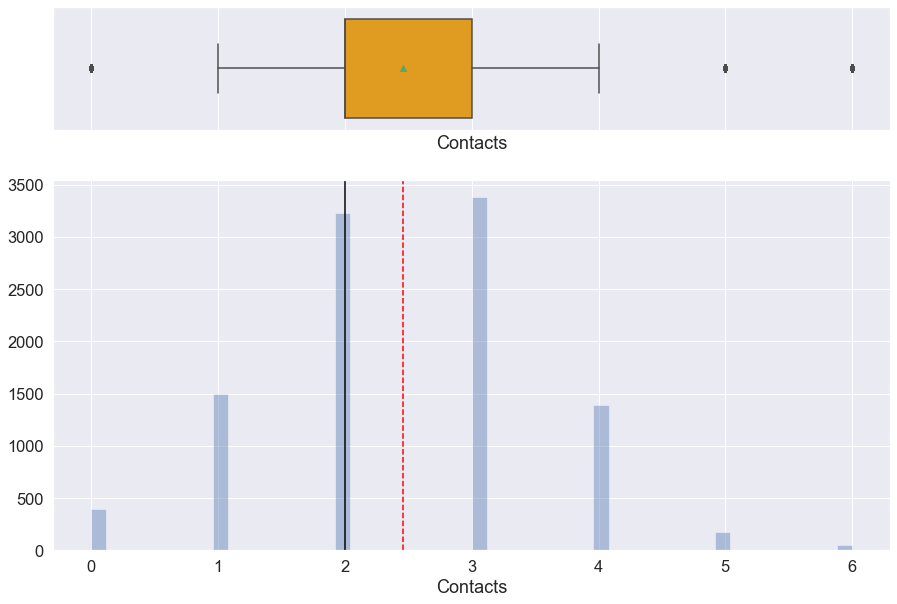

In [29]:
histogram_boxplot(bank['Contacts'])

The distribution of the number of contact in the last 12 months indicates left and right outliers on the boxplot.

A contact count of 3 shows the highest contact made over the 12 month period followed closely by a contact count of 2
contact count of 6 shows the least over the 12 month period.

The boxplot indicates outliers to theleft and to the right end.

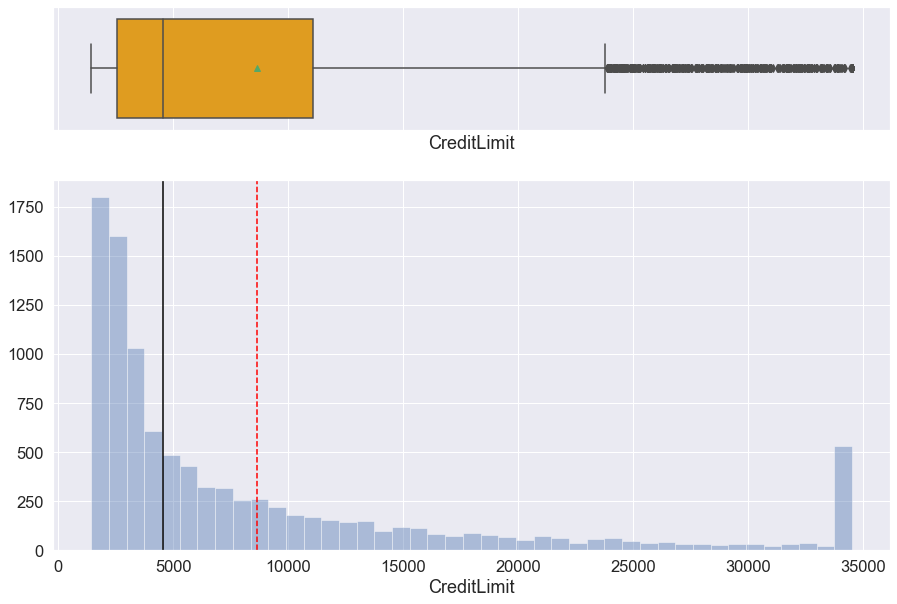

In [30]:
histogram_boxplot(bank['CreditLimit'])

The boxplot indicates outliers to the right end

The distribution of credit limit of credit card is right skewed

We may not treat these outliers as they could be representative of market trends

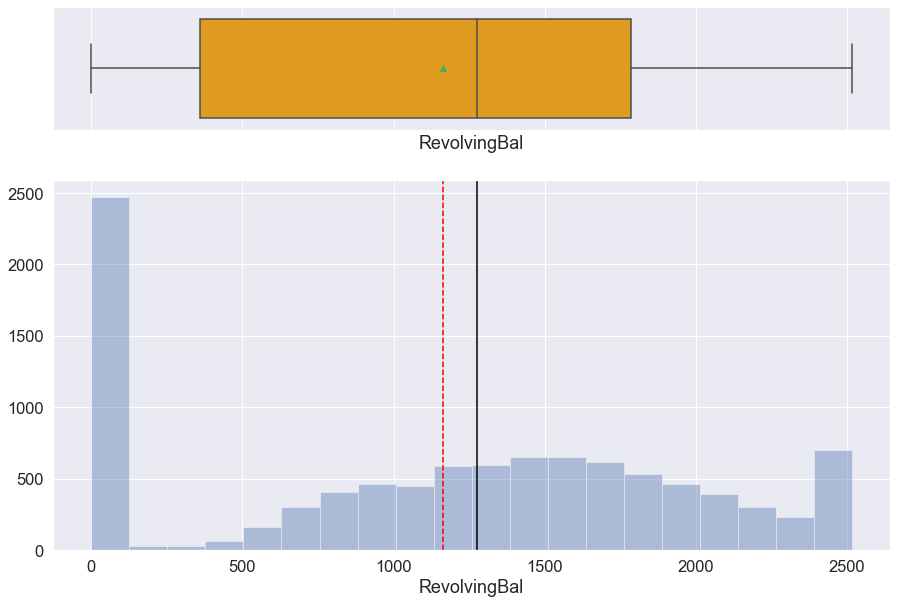

In [31]:
histogram_boxplot(bank['RevolvingBal'])

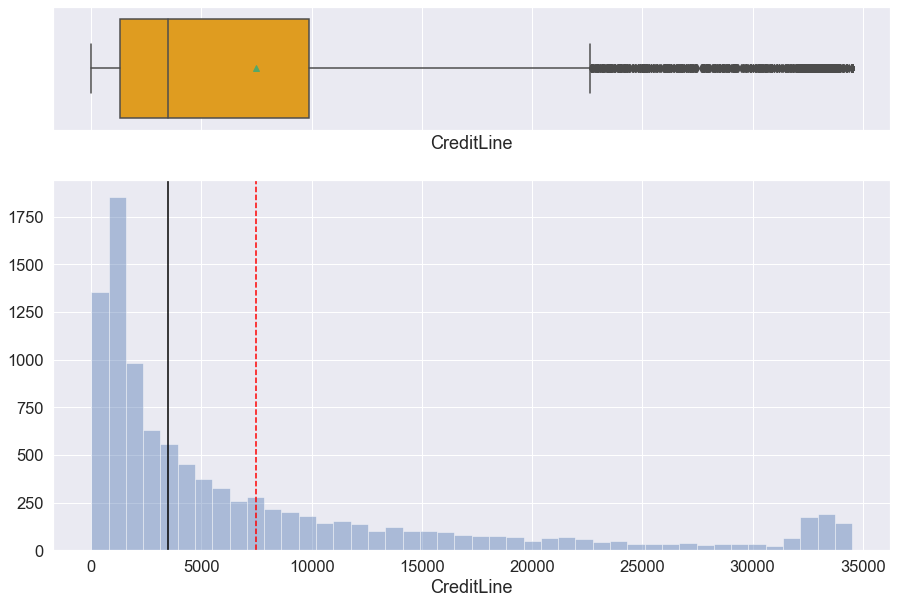

In [32]:
histogram_boxplot(bank['CreditLine'])

The boxplot indicates outliers to the right end

The distribution of the average of the last 12 months of open to buy credit line the credit amount is right skewed

We may not treat these outliers as they represent the real market trend

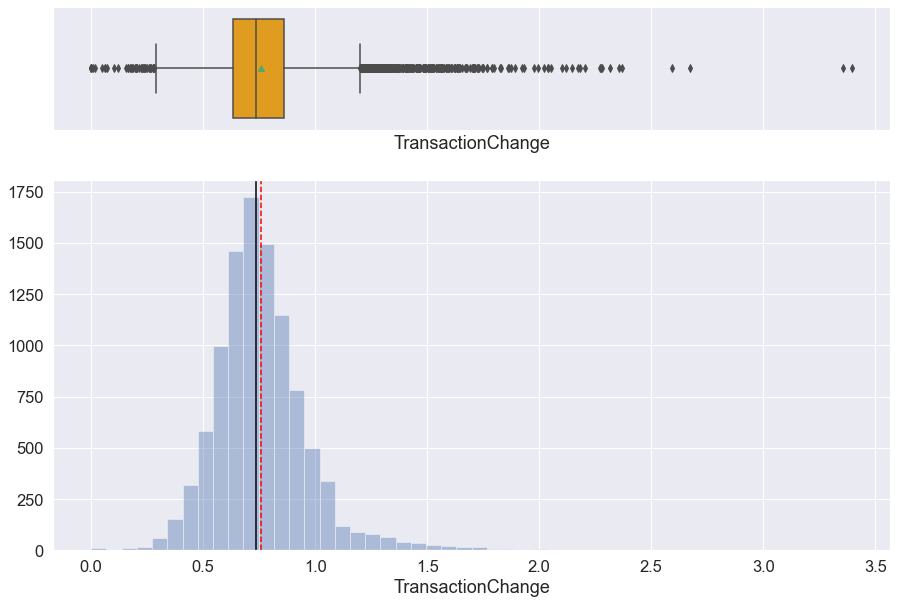

In [33]:
histogram_boxplot(bank['TransactionChange'])

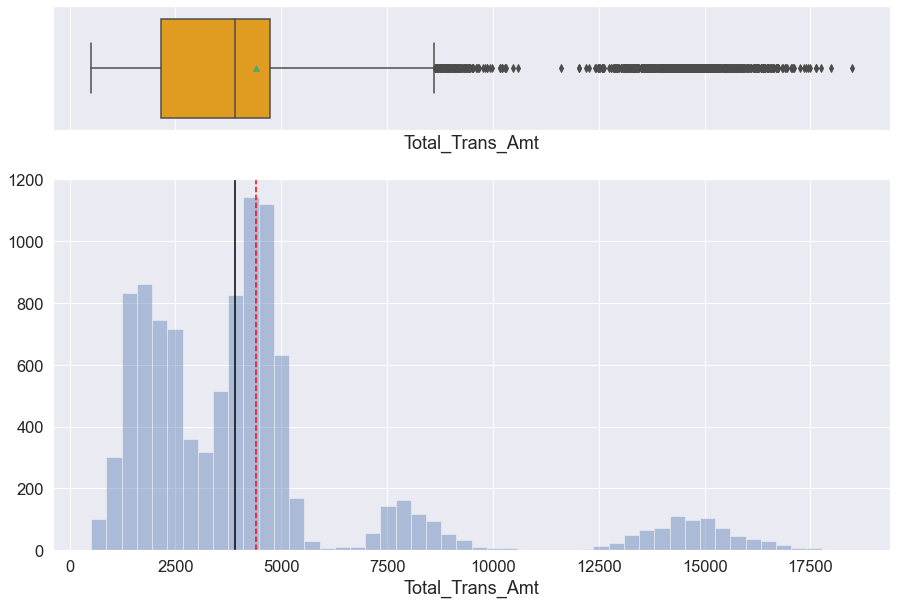

In [34]:
histogram_boxplot(bank['Total_Trans_Amt'])

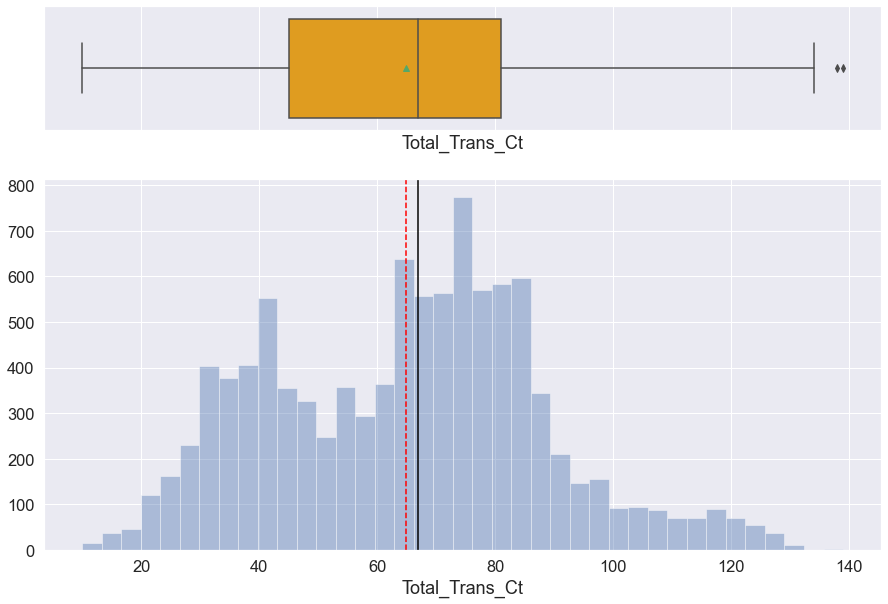

In [35]:
histogram_boxplot(bank['Total_Trans_Ct'])

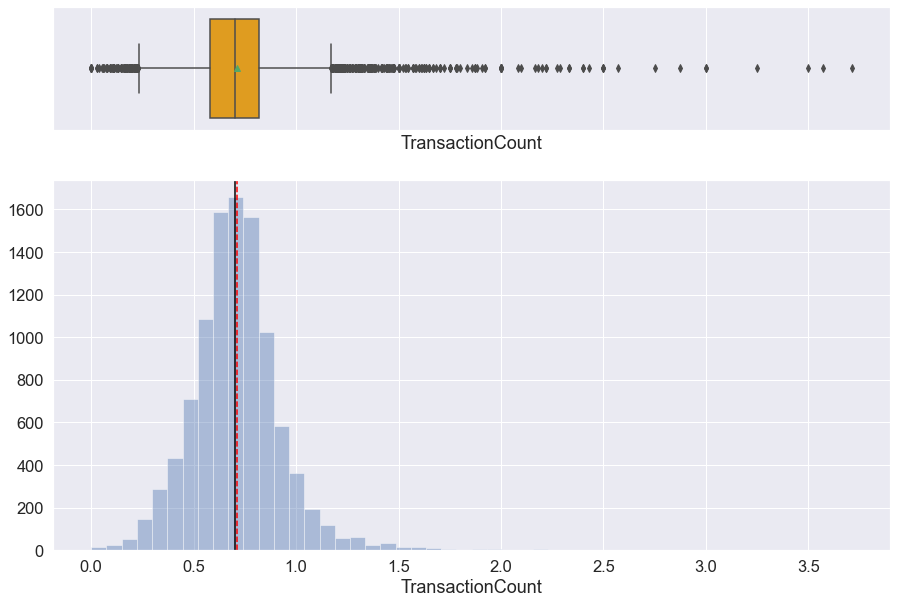

In [36]:
histogram_boxplot(bank['TransactionCount'])

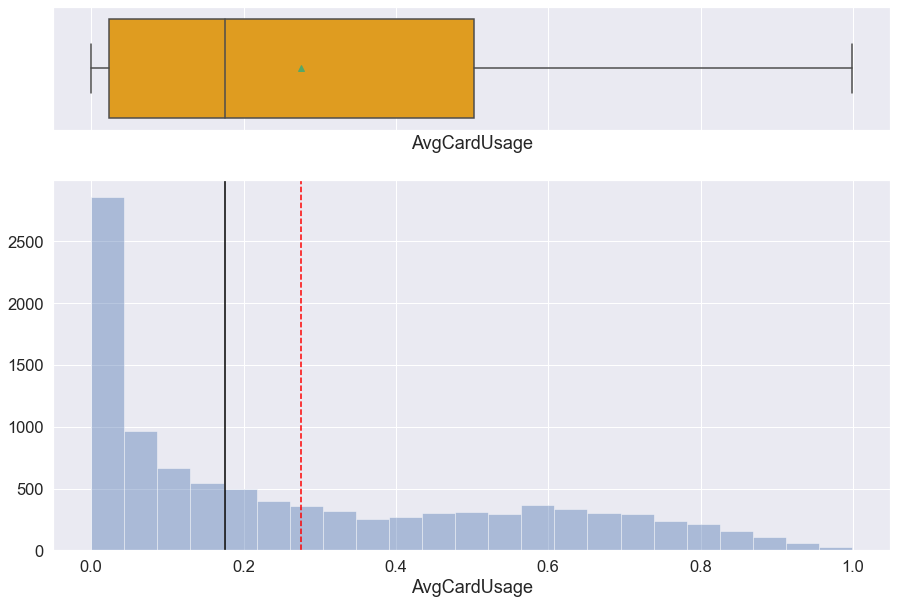

In [37]:
histogram_boxplot(bank['AvgCardUsage'])

In [46]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(n):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(bank[n]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(bank[n],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

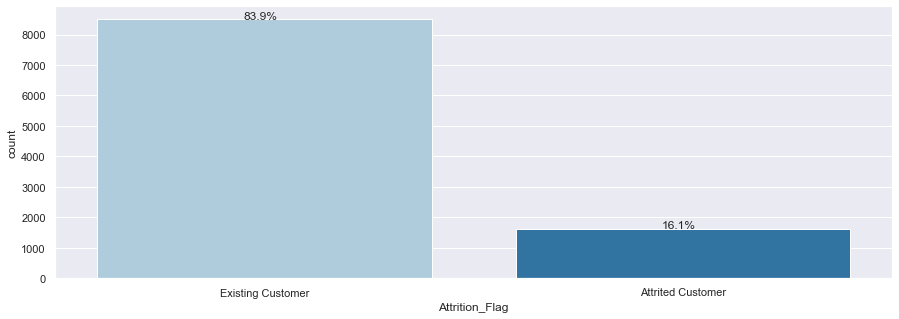

In [48]:
perc_on_bar('Attrition_Flag')

Of the total customers of The Thera Bank, a majority of 83.9 are existing customers while 16.1% are attrited customers

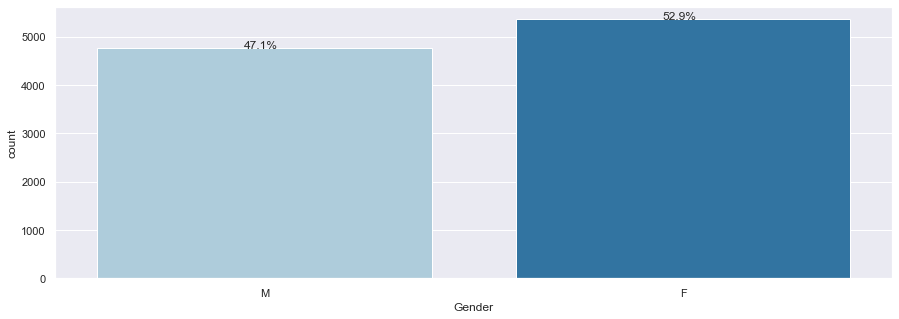

In [49]:
perc_on_bar('Gender')

Female customers holds slightly more accounts than male customers with 52.9% to 47.1%

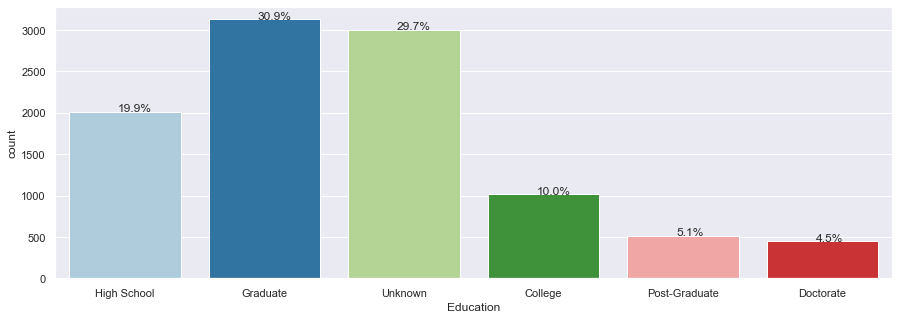

In [50]:
perc_on_bar('Education')

A majority of account holders have graduate qualifications (30.9% of the total customers) while those with doctoral qualifications have are the least amount of account holders (4.5%) Those whose education level is unknownk rank
the second highest with (29.7%)

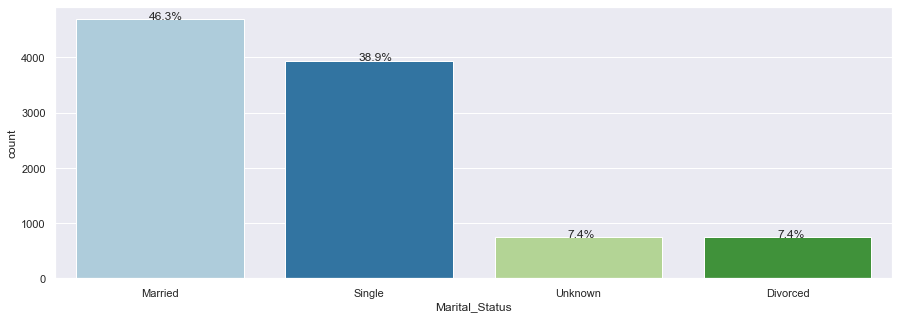

In [47]:
perc_on_bar('Marital_Status')

A majority of account holders are married with 46.3% followed by account holders who are single with 38.9%. Account holders who are divorced and whose marital status is unknown are next with 7.4% each.

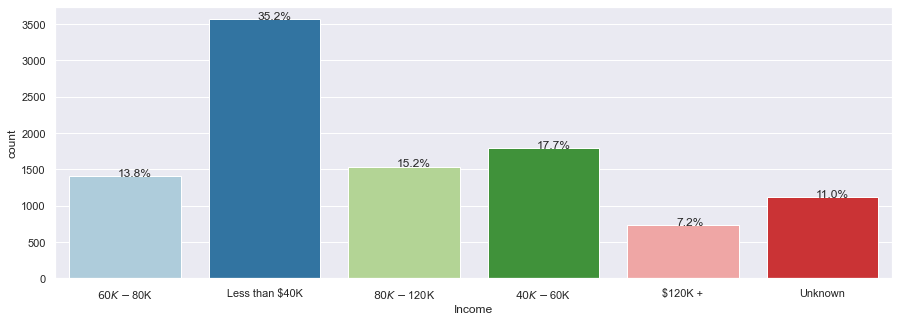

In [51]:
perc_on_bar('Income')

A majority of account holders (35.2%) are making annual income less than $40k followed by account holders makingannula income 40k-60k.

A minioriry of account holders (7.2%) has an annual income of $120 and up

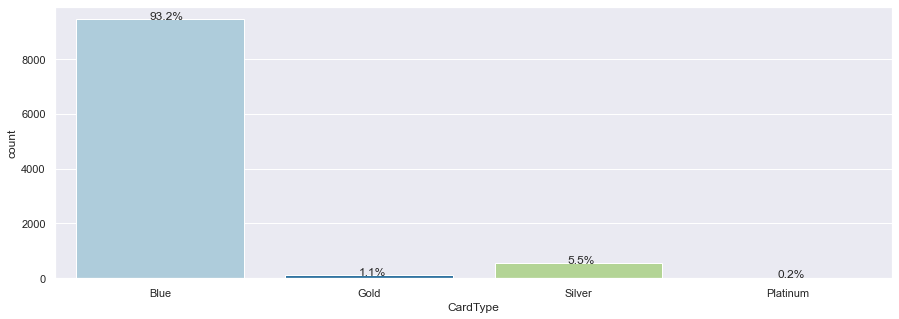

In [52]:
perc_on_bar('CardType')

A significant majority of customers (93.2%) are users of the Blue card. A minimal amount (0.2%) of customers are users of the Platinum card

# Bivariate Analysis

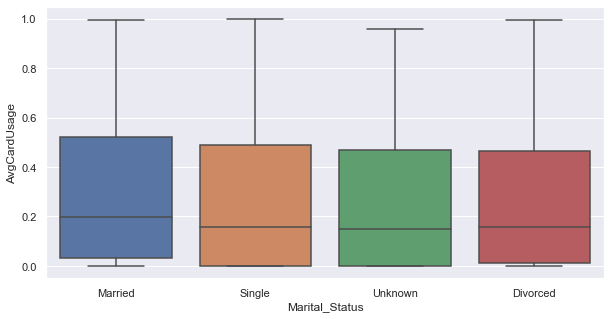

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(bank['Marital_Status'], bank['AvgCardUsage'])
plt.show()

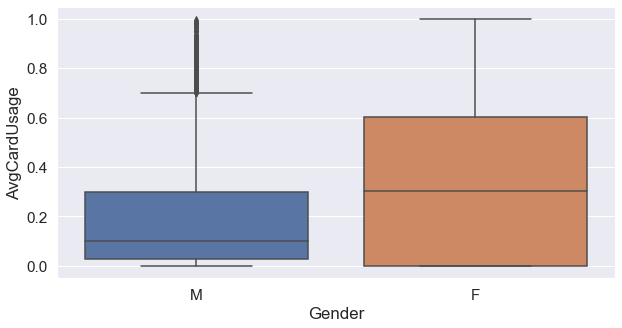

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(bank['Gender'], bank['AvgCardUsage'])
plt.show()

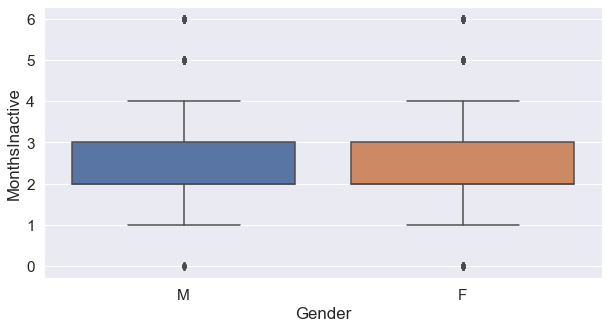

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(bank['Gender'], bank['MonthsInactive'])
plt.show()

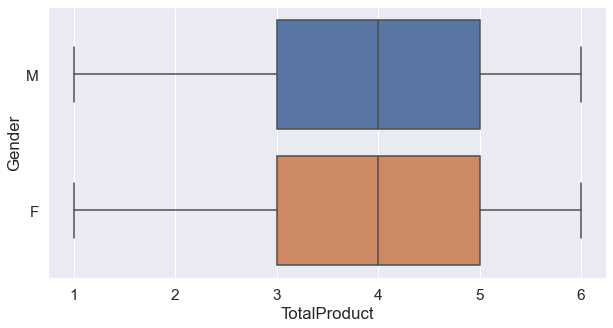

In [122]:
plt.figure(figsize=(10,5))
sns.boxplot(bank['TotalProduct'], bank['Gender'])
plt.show()

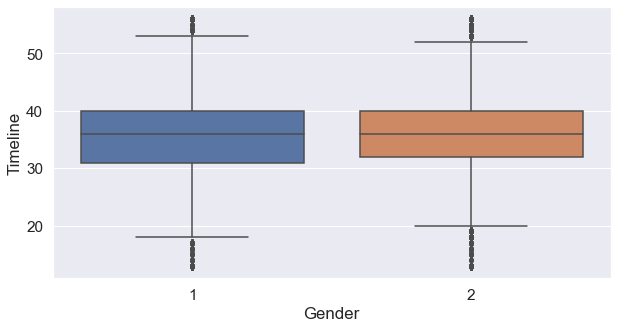

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(bank['Gender'], bank['Timeline'])
plt.show()

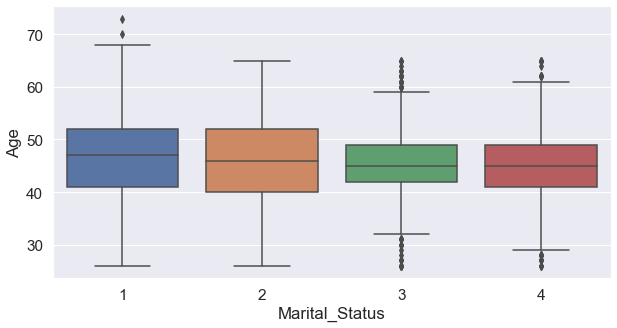

In [207]:
plt.figure(figsize=(10,5))
sns.boxplot(bank['Marital_Status'], bank['Age'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Region", y="Fresh", data=df,hue='Channel')
plt.grid()
plt.show()

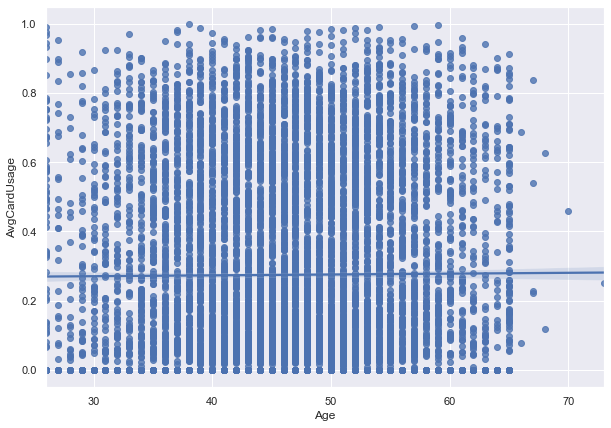

In [83]:
sns.regplot(y=bank.AvgCardUsage, x=bank.Age)

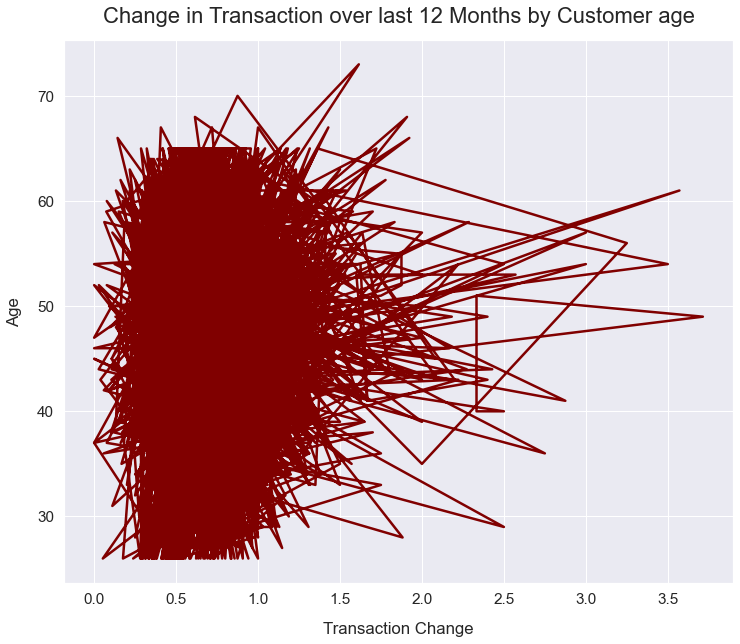

In [206]:
sns.set(font_scale=1.4)
bank.set_index('TransactionCount')['Age'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Transaction Change", labelpad=15)
plt.ylabel("Age", labelpad=15)
plt.title("Change in Transaction over last 12 Months by Customer age", y=1.02, fontsize=22);

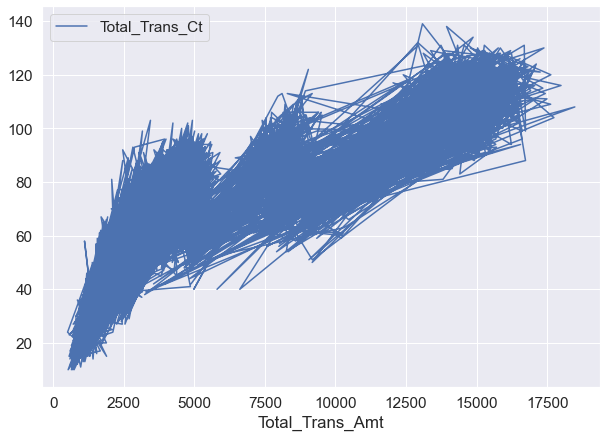

In [94]:
bank.plot( 'Total_Trans_Amt','Total_Trans_Ct' )
  

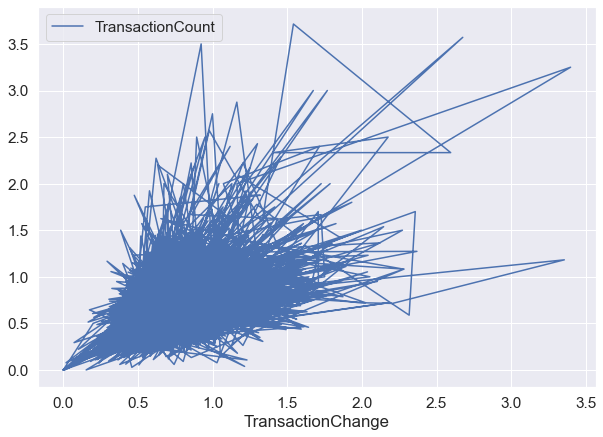

In [95]:
bank.plot( 'TransactionChange','TransactionCount' )

In [77]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, bank["MonthsInactive"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, bank["MonthsInactive"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

MonthsInactive   0     1     2     3    4    5    6    All
Education                                                 
College          2   218   317   405   47   15    9   1013
Doctorate        1    97   153   165   22    3   10    451
Graduate         7   680  1020  1193  129   58   41   3128
High School      9   448   655   756   84   38   23   2013
Post-Graduate    2   117   165   196   24    9    3    516
Unknown          8   673   972  1131  129   55   38   3006
All             29  2233  3282  3846  435  178  124  10127
------------------------------------------------------------------------------------------------------------------------


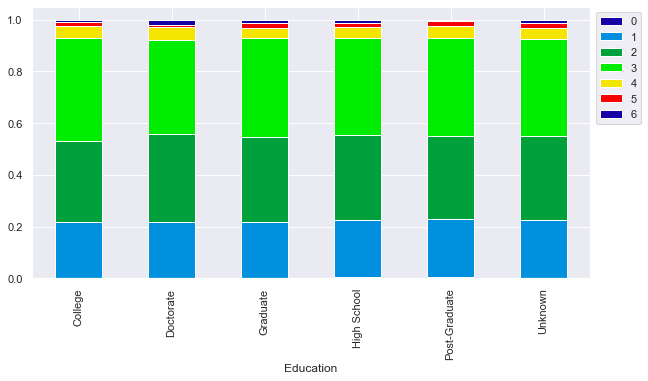

In [78]:
stacked_plot(bank["Education"])

Of all the Education categories combined, 3 months was the highest registed inactivity indicated with a total of 3846

Those with Graduate level education are most inactive over the 12 month period with 3128

Those with College level education are least inactive over the 12 month period with a mere 451



MonthsInactive   0     1     2     3    4    5    6    All
CardType                                                  
Blue            26  2084  3034  3592  413  168  119   9436
Gold             0    31    33    43    5    2    2    116
Platinum         0     4     8     7    1    0    0     20
Silver           3   114   207   204   16    8    3    555
All             29  2233  3282  3846  435  178  124  10127
------------------------------------------------------------------------------------------------------------------------


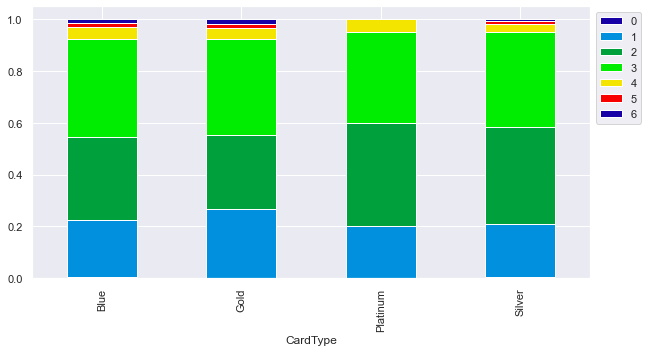

In [79]:
stacked_plot(bank["CardType"])

Blue card indicated the highest rate of inactivity over the 12 month period frollowed by Silver card

Platinum card indicates the least rate of inactivity of the 12 month period

MonthsInactive   0     1     2     3    4    5    6    All
Marital_Status                                            
Divorced         0   168   243   280   32   16    9    748
Married         14  1069  1492  1771  197   81   63   4687
Single          15   824  1287  1535  176   67   39   3943
Unknown          0   172   260   260   30   14   13    749
All             29  2233  3282  3846  435  178  124  10127
------------------------------------------------------------------------------------------------------------------------


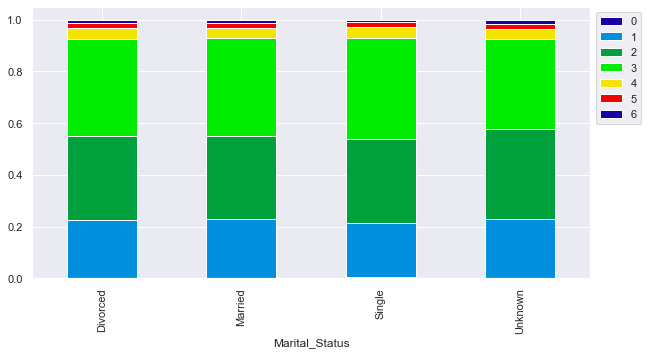

In [82]:
stacked_plot(bank["Marital_Status"])

Customers who are married have the highest level of inactivity over the 12 month period

Customers are divorced have the lowest level of inactivity followed very closely by customers who are single

MonthsInactive   0     1     2     3    4    5    6    All
Contacts                                                  
0                2   100   121   154   11    6    5    399
1                5   364   475   534   66   30   25   1499
2                5   723  1064  1221  129   56   29   3227
3               11   730  1085  1288  161   61   44   3380
4                5   285   461   546   57   21   17   1392
5                0    30    59    73    8    3    3    176
6                1     1    17    30    3    1    1     54
All             29  2233  3282  3846  435  178  124  10127
------------------------------------------------------------------------------------------------------------------------


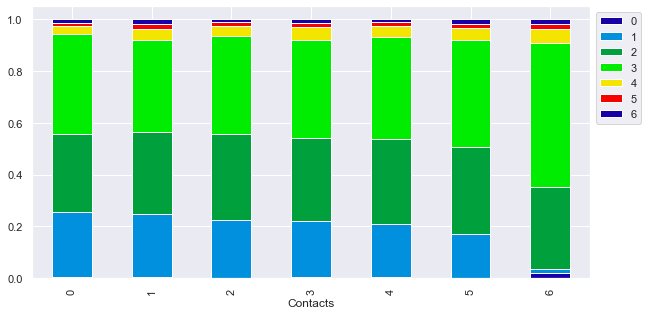

In [84]:
stacked_plot(bank["Contacts"])

An aggregate of 3 is most where contacts were made to customers  

A mojority of contacts were made to customers who were 3 months inactive 

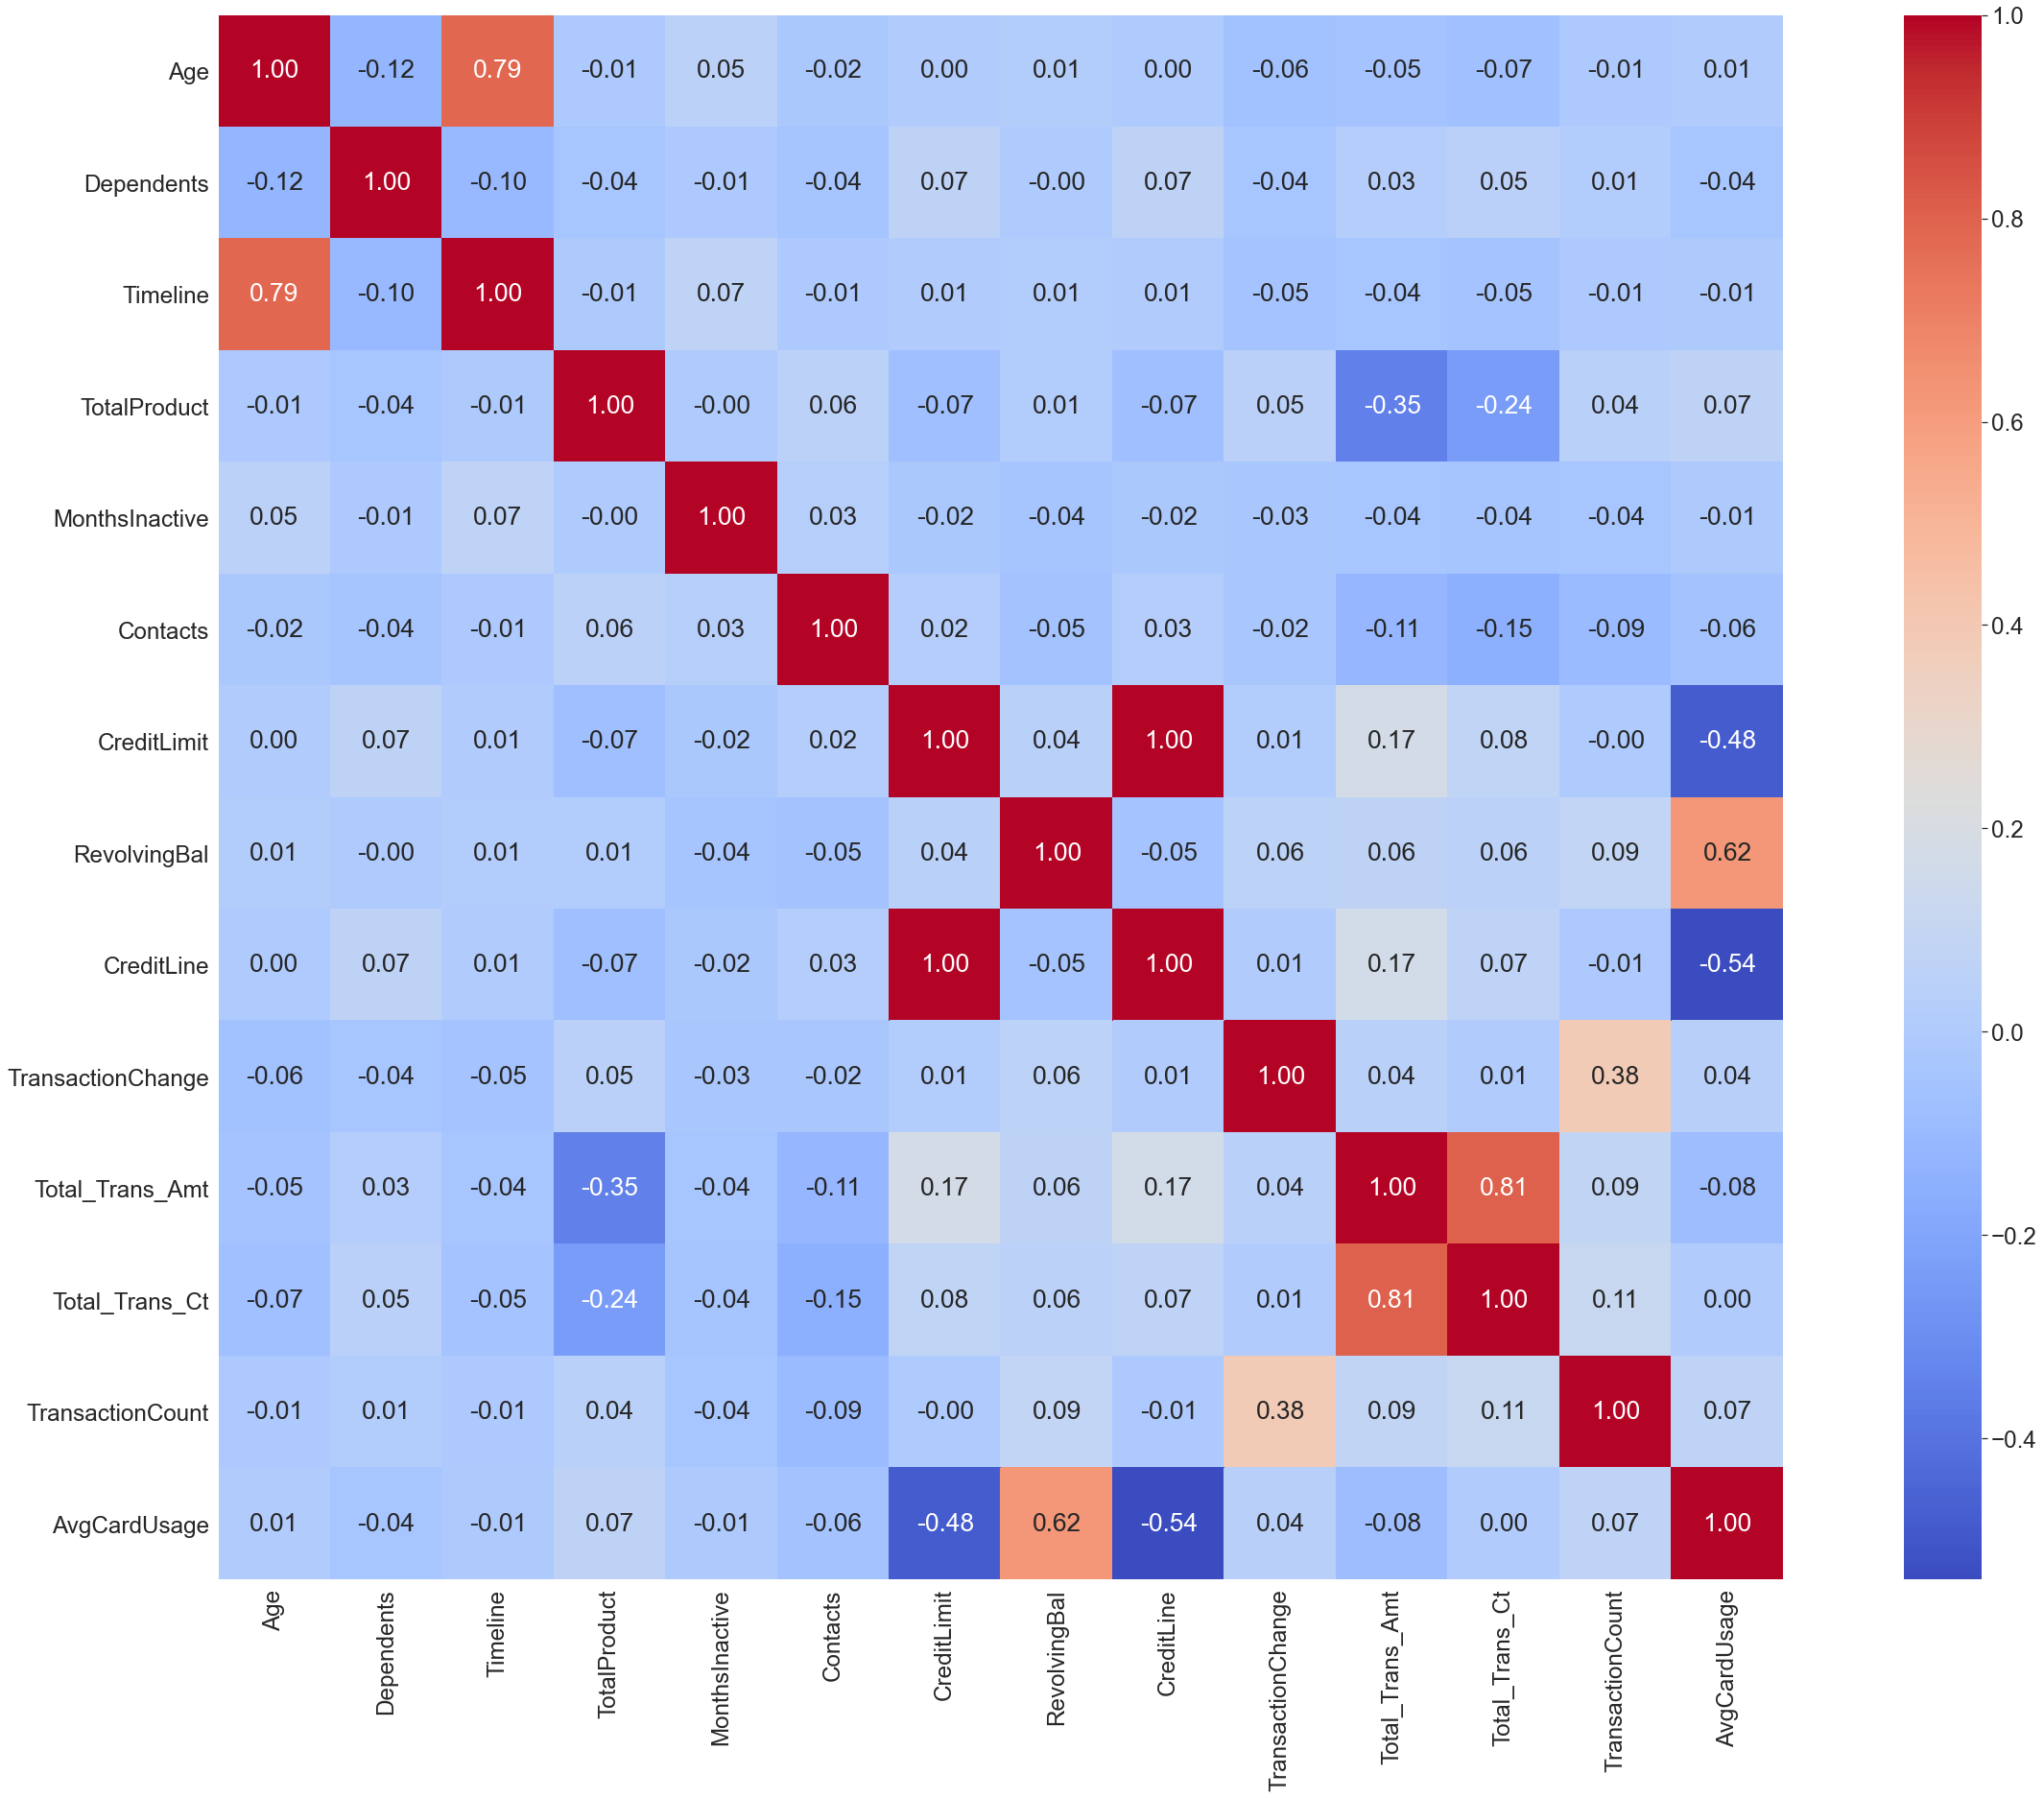

In [54]:
#examining the correlation values
sns.set(font_scale=2.2)
corr=bank.corr()
fig,ax=plt.subplots(figsize=(45,30))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="coolwarm")

Insight on Heat Map

There is a positive correlation between age and timeline of 0.79

There is a positive correlation between Total_Trans_Amt and Total_Trans_Ct of 0.81

There is a positive correlation between AvgCardUsage and RevolvingBal of 0.62

Other variables have no significant correlation between them

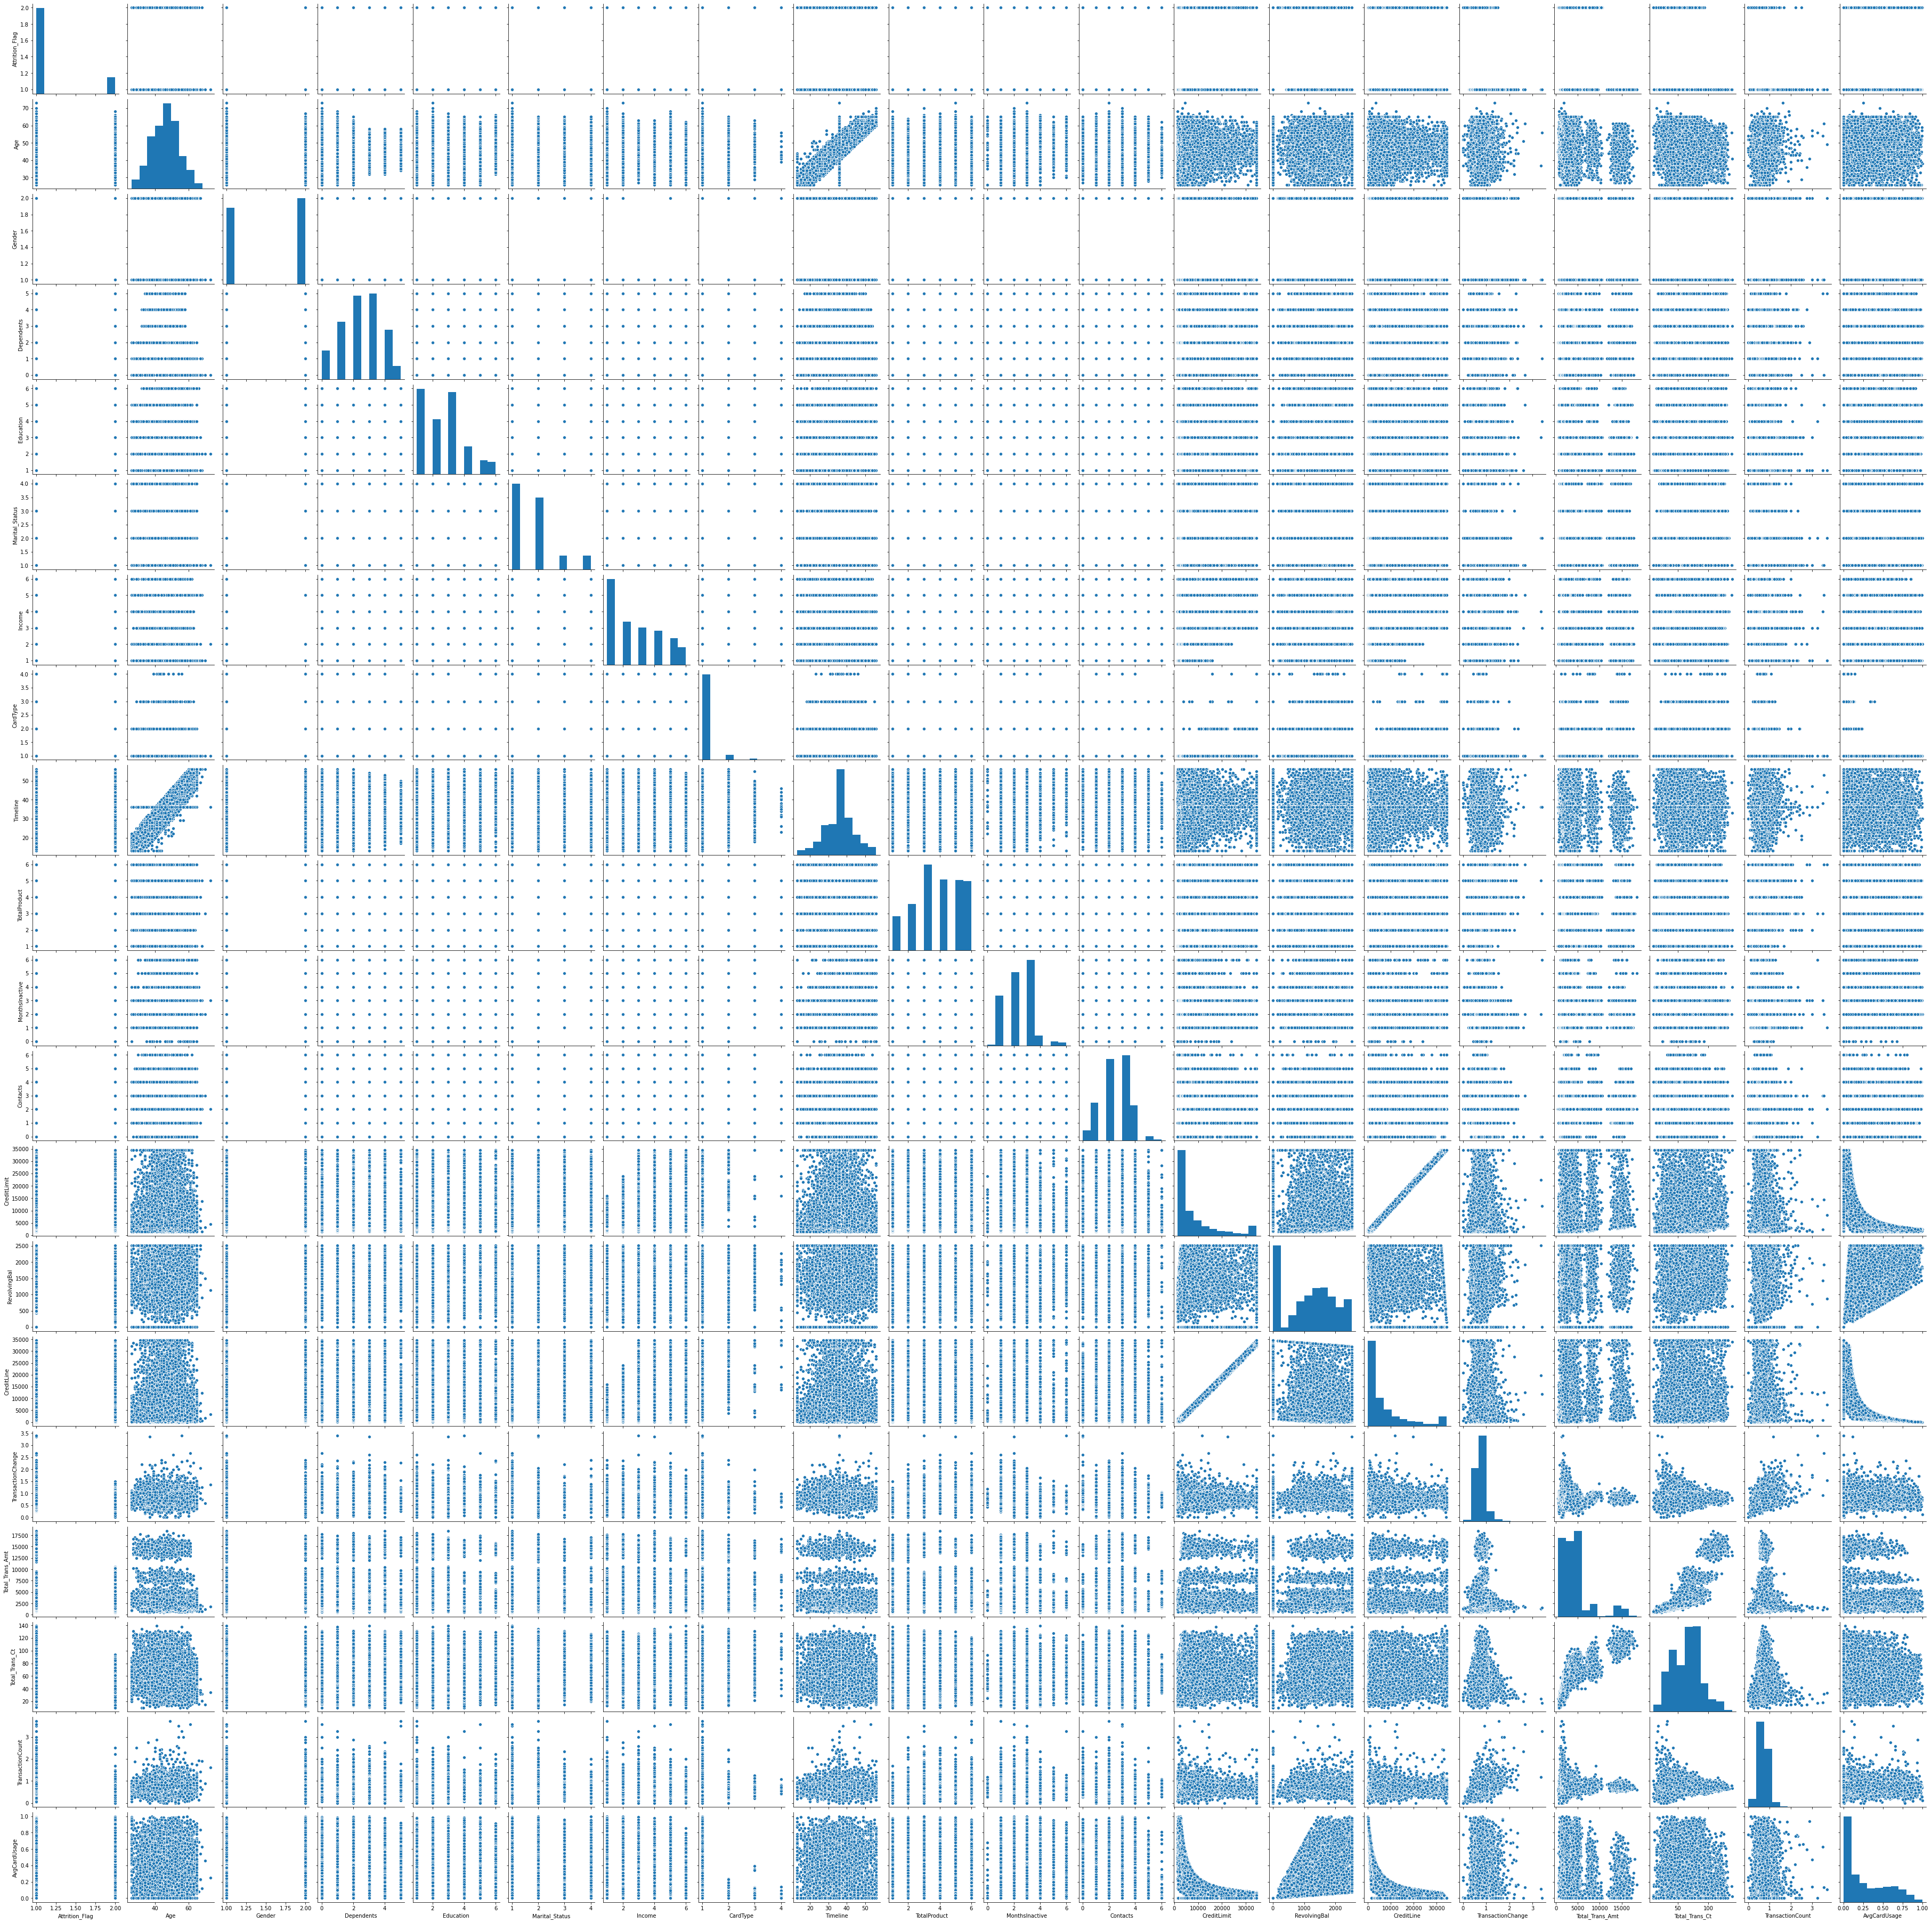

In [68]:
sns.pairplot(bank)

# Data Preparation

In [85]:
education = {"Graduate": 1, "High School":2 , "Unknown": 3, "College": 4, "Post-Graduate": 5, "Doctorate": 6}
bank['Education']=bank['Education'].map(education)

marital_status = {"Married": 1, "Single":2 , "Unknown": 3, "Divorced":4}
bank['Marital_Status']=bank['Marital_Status'].map(marital_status)

income = {"Less than $40K": 1,"$40K - $60K":2, "$80K - $120K": 3, "$60K - $80K": 4, "Unknown": 5, "$120K +": 6}
bank['Income']=bank['Income'].map(income)

cardtype = {"Blue": 1, "Silver":2 , "Gold": 3, "Platinum":4}
bank['CardType']=bank['CardType'].map(cardtype)

attrition_flag = {"Existing Customer": 1, "Attrited Customer":2}
bank['Attrition_Flag']=bank['Attrition_Flag'].map(attrition_flag)

gender = {"M": 1, "F":2}
bank['Gender']=bank['Gender'].map(gender)
                
                


In [86]:
count_nan = bank.isna().sum().sum()
print (count_nan)

0


In [87]:
#Replaces missing values with median value
for column in bank.columns:
    if bank[column].dtype != 'object': #columns not having data type as object
        median = bank[column].median()
        df[column] = bank[column].fillna(median)
    
bank.isnull().sum()

Attrition_Flag       0
Age                  0
Gender               0
Dependents           0
Education            0
Marital_Status       0
Income               0
CardType             0
Timeline             0
TotalProduct         0
MonthsInactive       0
Contacts             0
CreditLimit          0
RevolvingBal         0
CreditLine           0
TransactionChange    0
Total_Trans_Amt      0
Total_Trans_Ct       0
TransactionCount     0
AvgCardUsage         0
dtype: int64

In [88]:
bank.dtypes

Attrition_Flag         int64
Age                    int64
Gender                 int64
Dependents             int64
Education              int64
Marital_Status         int64
Income                 int64
CardType               int64
Timeline               int64
TotalProduct           int64
MonthsInactive         int64
Contacts               int64
CreditLimit          float64
RevolvingBal           int64
CreditLine           float64
TransactionChange    float64
Total_Trans_Amt        int64
Total_Trans_Ct         int64
TransactionCount     float64
AvgCardUsage         float64
dtype: object

Model building - Logistic Regression

Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required

In [89]:
bank.head(10)

Attrition_Flag  Age  Gender  Dependents  Education  Marital_Status  Income  \
0               1   45       1           3          2               1       4   
1               1   49       2           5          1               2       1   
2               1   51       1           3          1               1       3   
3               1   40       2           4          2               3       1   
4               1   40       1           3          3               1       4   
5               1   44       1           2          1               1       2   
6               1   51       1           4          3               1       6   
7               1   32       1           0          2               3       4   
8               1   37       1           3          3               2       4   
9               1   48       1           2          1               2       3   

   CardType  Timeline  TotalProduct  MonthsInactive  Contacts  CreditLimit  \
0         1        39             5               1         3      12691.0   
1         1        44             6               1         2       8256.0   
2         1        36             4               1         0       3418.0   
3         1        34             3               4         1       3313.0   
4         1        21             5               1         0       4716.0   
5         1        36             3               1         2       4010.0   
6         3        46             6               1         3      34516.0   
7         2        27             2               2         2      29081.0   
8         1        36             5               2         0      22352.0   
9         1        36             6               3         3      11656.0   

   RevolvingBal  CreditLine  TransactionChange  Total_Trans_Amt  \
0           777     11914.0              1.335             1144   
1           864      7392.0              1.541             1291   
2             0      3418.0              2.594             1887   
3          2517       796.0              1.405             1171   
4             0      4716.0              2.175              816   
5          1247      2763.0              1.376             1088   
6          2264     32252.0              1.975             1330   
7          1396     27685.0              2.204             1538   
8          2517     19835.0              3.355             1350   
9          1677      9979.0              1.524             1441   

   Total_Trans_Ct  TransactionCount  AvgCardUsage  
0              42             1.625         0.061  
1              33             3.714         0.105  
2              20             2.333         0.000  
3              20             2.333         0.760  
4              28             2.500         0.000  
5              24             0.846         0.311  
6              31             0.722         0.066  
7              36             0.714         0.048  
8              24             1.182         0.113  
9              32             0.882         0.144

In [90]:
#
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="median")
cols=['Dependents','Timeline','TotalProduct','MonthsInactive','Contacts','CreditLimit','RevolvingBal','TransactionChange',
      'Total_Trans_Amt','Total_Trans_Ct','TransactionCount','AvgCardUsage']
imputer = rep_0.fit(bank[cols])
bank[cols] = imputer.transform(bank[cols])


bank.head(10)


Attrition_Flag  Age  Gender  Dependents  Education  Marital_Status  Income  \
0               1   45       1         3.0          2               1       4   
1               1   49       2         5.0          1               2       1   
2               1   51       1         3.0          1               1       3   
3               1   40       2         4.0          2               3       1   
4               1   40       1         3.0          3               1       4   
5               1   44       1         2.0          1               1       2   
6               1   51       1         4.0          3               1       6   
7               1   32       1         3.0          2               3       4   
8               1   37       1         3.0          3               2       4   
9               1   48       1         2.0          1               2       3   

   CardType  Timeline  TotalProduct  MonthsInactive  Contacts  CreditLimit  \
0         1      39.0           5.0             1.0       3.0      12691.0   
1         1      44.0           6.0             1.0       2.0       8256.0   
2         1      36.0           4.0             1.0       3.0       3418.0   
3         1      34.0           3.0             4.0       1.0       3313.0   
4         1      21.0           5.0             1.0       3.0       4716.0   
5         1      36.0           3.0             1.0       2.0       4010.0   
6         3      46.0           6.0             1.0       3.0      34516.0   
7         2      27.0           2.0             2.0       2.0      29081.0   
8         1      36.0           5.0             2.0       3.0      22352.0   
9         1      36.0           6.0             3.0       3.0      11656.0   

   RevolvingBal  CreditLine  TransactionChange  Total_Trans_Amt  \
0         777.0     11914.0              1.335           1144.0   
1         864.0      7392.0              1.541           1291.0   
2        1524.0      3418.0              2.594           1887.0   
3        2517.0       796.0              1.405           1171.0   
4        1524.0      4716.0              2.175            816.0   
5        1247.0      2763.0              1.376           1088.0   
6        2264.0     32252.0              1.975           1330.0   
7        1396.0     27685.0              2.204           1538.0   
8        2517.0     19835.0              3.355           1350.0   
9        1677.0      9979.0              1.524           1441.0   

   Total_Trans_Ct  TransactionCount  AvgCardUsage  
0            42.0             1.625         0.061  
1            33.0             3.714         0.105  
2            20.0             2.333         0.306  
3            20.0             2.333         0.760  
4            28.0             2.500         0.306  
5            24.0             0.846         0.311  
6            31.0             0.722         0.066  
7            36.0             0.714         0.048  
8            24.0             1.182         0.113  
9            32.0             0.882         0.144

In [91]:
bank.shape

(10127, 20)

In [92]:
#from sklearn.model_selection import train_test_split

X = bank.drop('Attrition_Flag',axis=1)     # Predictor feature columns (8 X m)
Y = bank['Attrition_Flag']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

Age  Gender  Dependents  Education  Marital_Status  Income  CardType  \
8284   45       2         4.0          4               3       1         1   
9863   29       1         1.0          1               4       1         1   
5350   55       2         2.0          3               2       5         1   
9641   51       2         3.0          3               1       1         1   
5914   47       2         3.0          2               2       1         1   

      Timeline  TotalProduct  MonthsInactive  Contacts  CreditLimit  \
8284      40.0           1.0             2.0       1.0       1795.0   
9863      36.0           4.0             3.0       2.0       3839.0   
5350      36.0           4.0             3.0       2.0      10241.0   
9641      33.0           3.0             3.0       3.0       7428.0   
5914      31.0           5.0             1.0       3.0       2317.0   

      RevolvingBal  CreditLine  TransactionChange  Total_Trans_Amt  \
8284        1058.0       737.0              0.778           5575.0   
9863        1139.0      2700.0              0.632          14791.0   
5350        1545.0      8696.0              0.581           2513.0   
9641        1524.0      7428.0              0.873           8078.0   
5914        1524.0      2317.0              0.570           4894.0   

      Total_Trans_Ct  TransactionCount  AvgCardUsage  
8284            73.0             0.738         0.589  
9863           124.0             0.771         0.297  
5350            47.0             0.424         0.151  
9641            62.0             0.722         0.306  
5914            89.0             0.854         0.306

In [93]:
#checks the split of data
print("{0:0.2f}% bank is in training set".format((len(x_train)/len(bank.index)) * 100))
print("{0:0.2f}% bank is in test set".format((len(x_test)/len(bank.index)) * 100))

69.99% bank is in training set
30.01% bank is in test set


In [94]:
print("Original Atrrition True Values    : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Attrition_Flag'] == 1]), (len(bank.loc[bank['Attrition_Flag'] == 1])/len(bank.index)) * 100))
print("Original Attrition False Values   : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Attrition_Flag'] == 0]), (len(bank.loc[bank['Attrition_Flag'] == 0])/len(bank.index)) * 100))
print("")
print("Training Attrition True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Attrition False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Attrition True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Attrition False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Atrrition True Values    : 8500 (83.93%)
Original Attrition False Values   : 0 (0.00%)

Training Attrition True Values    : 5949 (83.93%)
Training Attrition False Values   : 0 (0.00%)

Test Attrition True Values        : 2551 (83.94%)
Test Attrition False Values       : 0 (0.00%)



In [95]:
#rom sklearn import metrics
#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
          #0      

          0         1         2         3         4        5         6  \
0  0.001051  0.195633  0.150842  0.112638  0.217463  0.00452  0.089496   

          7         8         9        10        11        12        13  \
0  0.001251 -0.381594  0.433615  0.370423 -0.001293  0.001266  0.001287   

         14       15        16       17        18  intercept  
0 -0.070154  0.00041 -0.106262 -0.21156  0.025523   0.039999  


In [26]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8917407041790063


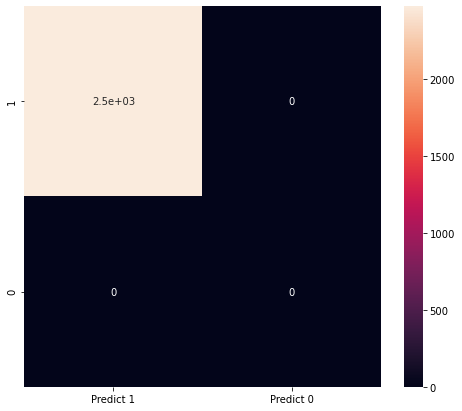

In [27]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

bank_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,7))
sns.heatmap(bank_cm, annot=True)

In [28]:
Y_pred_test = Logistic_model.predict(X_test)

NameError: name 'Logistic_model' is not defined

Model building - Bagging and Boosting

Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models

# Decision Tree

In [444]:
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [446]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [447]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.4946750229739544
RMSE on training set :  0.0
RMSE on test set :  0.26098756934463097


Random forest overfitting on r2 train set and performing poorly on test set r2 with 49% 

RMSE training and test are performing poorly 

# Hyperparameter Tuning on Decision Tree

In [448]:
# classifier used. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, random_state=1)

In [449]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.7718989058844862
R-square on test set :  0.6349115824506397
RMSE on training set :  0.17539767079980592
RMSE on test set :  0.22183673660640607


In [450]:
#Use of  It is also known as the Gini importance 

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                        Imp
Total_Trans_Ct     0.362828
Total_Trans_Amt    0.250756
TotalProduct       0.103529
TransactionCount   0.087315
TransactionChange  0.067011
Age                0.037725
AvgCardUsage       0.026032
CreditLine         0.021695
CreditLimit        0.016419
RevolvingBal       0.013916
Education          0.003414
MonthsInactive     0.003155
Gender             0.001772
Contacts           0.001646
Timeline           0.001449
Marital_Status     0.000727
Income             0.000610
CardType           0.000000
Dependents         0.000000


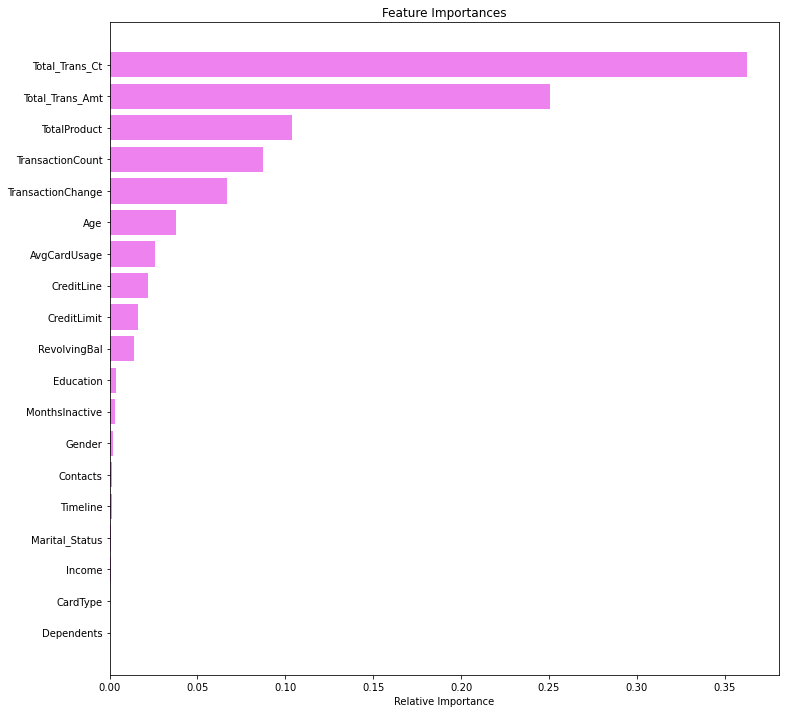

In [451]:
from sklearn.tree import DecisionTreeRegressor
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
X = bank.drop("Attrition_Flag" , axis=1)
y = bank.pop("Attrition_Flag")

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [218]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [219]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# Bagging Estimator

In [45]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [51]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9966139954853274
Accuracy on test set :  0.9611714379730174
Recall on training set :  0.9994957135653051
Recall on test set :  0.981967855742846
Precision on training set :  0.9964806435394671
Precision on test set :  0.9720605355064028


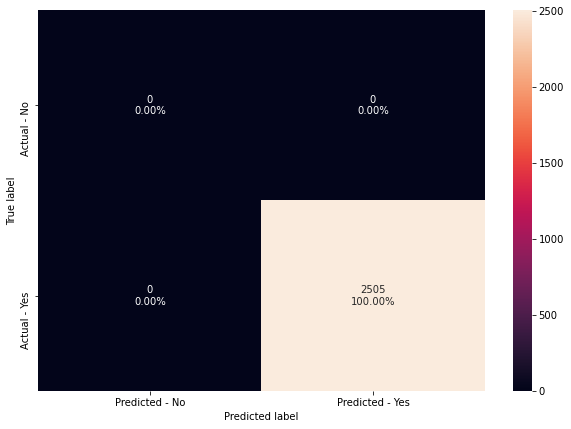

In [52]:
make_confusion_matrix(bagging_estimator,y_test)

# Random Forest Classifier

In [53]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

In [54]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [55]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9598552155314248
Recall on training set :  1.0
Recall on test set :  0.9862798902391219
Precision on training set :  1.0
Precision on test set :  0.9665770265078756


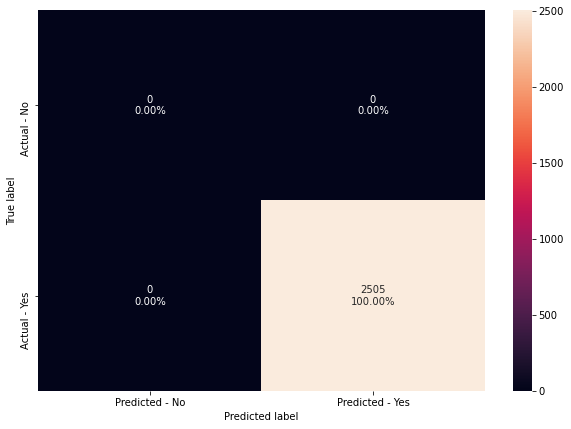

In [56]:
make_confusion_matrix(bagging_estimator,y_test)

In [89]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [425]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [426]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9964729119638827
Accuracy on test set :  0.9565646594274433
Recall on training set :  0.9988233316523786
Recall on test set :  0.9792238337906704
Precision on training set :  0.9969798657718121
Precision on test set :  0.9693441986806364


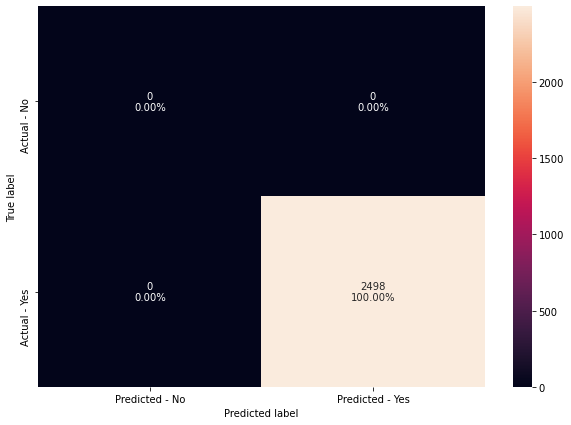

In [427]:
make_confusion_matrix(bagging_estimator,y_test)

In [96]:
bank.head(20)

Attrition_Flag  Age  Gender  Dependents  Education  Marital_Status  \
0                1   45       1         3.0          2               1   
1                1   49       2         5.0          1               2   
2                1   51       1         3.0          1               1   
3                1   40       2         4.0          2               3   
4                1   40       1         3.0          3               1   
5                1   44       1         2.0          1               1   
6                1   51       1         4.0          3               1   
7                1   32       1         3.0          2               3   
8                1   37       1         3.0          3               2   
9                1   48       1         2.0          1               2   
10               1   42       1         5.0          3               3   
11               1   65       1         1.0          3               1   
12               1   56       1         1.0          4               2   
13               1   35       1         3.0          1               3   
14               1   57       2         2.0          1               1   
15               1   44       1         4.0          3               3   
16               1   48       1         4.0          5               2   
17               1   41       1         3.0          3               1   
18               1   61       1         1.0          2               1   
19               1   45       2         2.0          1               1   

    Income  CardType  Timeline  TotalProduct  MonthsInactive  Contacts  \
0        4         1      39.0           5.0             1.0       3.0   
1        1         1      44.0           6.0             1.0       2.0   
2        3         1      36.0           4.0             1.0       3.0   
3        1         1      34.0           3.0             4.0       1.0   
4        4         1      21.0           5.0             1.0       3.0   
5        2         1      36.0           3.0             1.0       2.0   
6        6         3      46.0           6.0             1.0       3.0   
7        4         2      27.0           2.0             2.0       2.0   
8        4         1      36.0           5.0             2.0       3.0   
9        3         1      36.0           6.0             3.0       3.0   
10       6         1      31.0           5.0             3.0       2.0   
11       2         1      54.0           6.0             2.0       3.0   
12       3         1      36.0           3.0             6.0       3.0   
13       4         1      30.0           5.0             1.0       3.0   
14       1         1      48.0           5.0             2.0       2.0   
15       3         1      37.0           5.0             1.0       2.0   
16       3         1      36.0           6.0             2.0       3.0   
17       3         1      34.0           4.0             4.0       1.0   
18       2         1      56.0           2.0             2.0       3.0   
19       5         1      37.0           6.0             1.0       2.0   

    CreditLimit  RevolvingBal  CreditLine  TransactionChange  Total_Trans_Amt  \
0       12691.0         777.0     11914.0              1.335           1144.0   
1        8256.0         864.0      7392.0              1.541           1291.0   
2        3418.0        1524.0      3418.0              2.594           1887.0   
3        3313.0        2517.0       796.0              1.405           1171.0   
4        4716.0        1524.0      4716.0              2.175            816.0   
5        4010.0        1247.0      2763.0              1.376           1088.0   
6       34516.0        2264.0     32252.0              1.975           1330.0   
7       29081.0        1396.0     27685.0              2.204           1538.0   
8       22352.0        2517.0     19835.0              3.355           1350.0   
9       11656.0        1677.0      9979.0              1.524           1441.0   
10 

In [97]:
X = bank.drop("Attrition_Flag" , axis=1)
y = bank.pop("Attrition_Flag")

In [98]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [99]:
# Creating a list of columns with missing values
reqd_col_for_impute = ["Gender", "Education","Marital_Status", "Income","CardType"]

In [100]:
imputer = KNNImputer(n_neighbors=5)

In [101]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [102]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Age                  0
Gender               0
Dependents           0
Education            0
Marital_Status       0
Income               0
CardType             0
Timeline             0
TotalProduct         0
MonthsInactive       0
Contacts             0
CreditLimit          0
RevolvingBal         0
CreditLine           0
TransactionChange    0
Total_Trans_Amt      0
Total_Trans_Ct       0
TransactionCount     0
AvgCardUsage         0
dtype: int64
------------------------------
Age                  0
Gender               0
Dependents           0
Education            0
Marital_Status       0
Income               0
CardType             0
Timeline             0
TotalProduct         0
MonthsInactive       0
Contacts             0
CreditLimit          0
RevolvingBal         0
CreditLine           0
TransactionChange    0
Total_Trans_Amt      0
Total_Trans_Ct       0
TransactionCount     0
AvgCardUsage         0
dtype: int64


In [103]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [104]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 96.46993801725905
RF: 99.02508286746153
GBM: 98.94099271331746
ADB: 97.89882041967333
[23:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restor

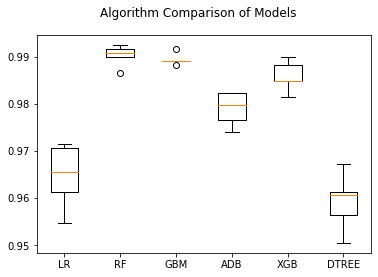

In [37]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison of Models")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Insight:

Random Forest (RF) indicates the highest cross validated call with one lower outlier followed by Gradient Boost (GBM) which 
contain upper and lower outliers.

XGBoost (XGB) ranks third in the algorithm comparison  

The models are overfitting so we will seek to improve theor performance 


In [105]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [106]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

param_grid = {
    "rf__n_estimators": [100, 130],
    "rf__max_depth": [20, 50],
    "rf__min_samples_split": [2, 3],
    "rf__min_samples_leaf": [3,5 ],
    "rf__class_weight": [0.7, 0.8, 0.9, 1],
}

# XGB

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

In [ ]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)


In [ ]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

In [ ]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

# Decision tree

In [27]:
array = bank.values
X = array[:,0:6] # select all rows and first 19 columns which are the attributes
Y = array[:,6]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

# SMOTE to upsample smaller class

In [39]:
!pip install imblearn

In [40]:

from imblearn.over_sampling import SMOTE
#from imblearn import under_sampling, over_sampling
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

In [45]:

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 5949
Before UpSampling, counts of label '0': 0 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 0 

After UpSampling, the shape of train_X: (11898, 19)
After UpSampling, the shape of train_y: (11898,) 



Hyperparameter tuning using grid search

Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning

Model Performances

Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization

Actionable Insights & Recommendations

Business recommendations and insights

Report - Overall quality

Structure and flow - Crispness - Visual appeal - All key insights and recommendations covered